In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
digits = load_digits()

X = digits.data
y = digits.target


In [3]:
X.shape

(1797, 64)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA()
pca.fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

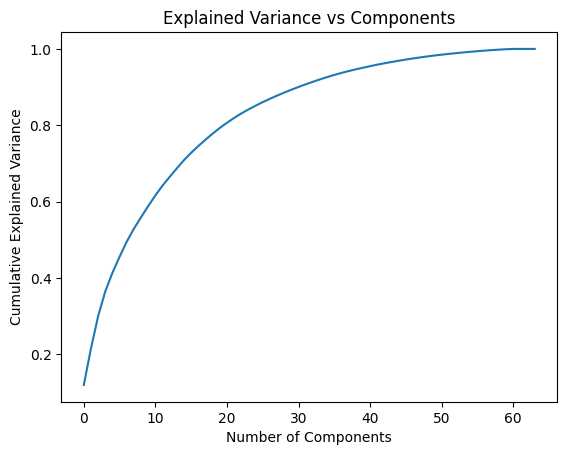

In [6]:
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.show()

In [7]:
pca_30 = PCA(n_components=30)
X_reduced = pca_30.fit_transform(X_scaled)

X_reduced.shape


(1797, 30)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_original = LogisticRegression(max_iter=2000)
model_original.fit(X_train, y_train)

y_pred_original = model_original.predict(X_test)

acc_original = accuracy_score(y_test, y_pred_original)
acc_original


0.9722222222222222

In [9]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

model_reduced = LogisticRegression(max_iter=2000)
model_reduced.fit(X_train_r, y_train_r)

y_pred_reduced = model_reduced.predict(X_test_r)

acc_reduced = accuracy_score(y_test_r, y_pred_reduced)
acc_reduced


0.9611111111111111

In [10]:
print("Accuracy (Original Data):", acc_original)
print("Accuracy (Reduced Data - PCA):", acc_reduced)

Accuracy (Original Data): 0.9722222222222222
Accuracy (Reduced Data - PCA): 0.9611111111111111


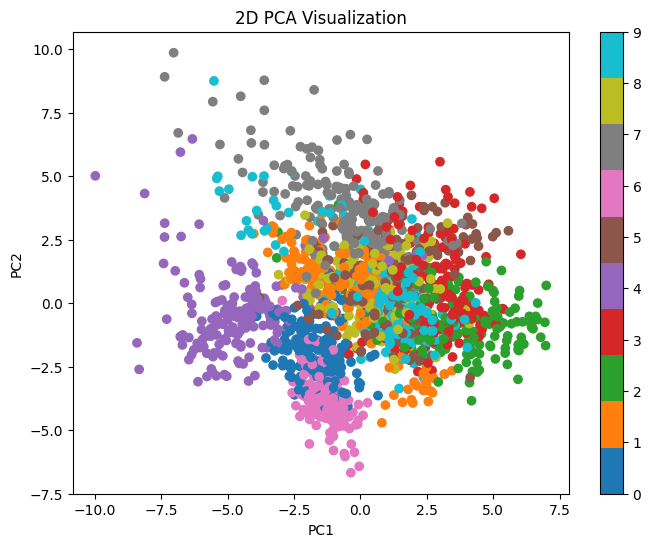

In [11]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Visualization")
plt.colorbar(scatter)
plt.show()


In [ ]:
The intern successfully applied PCA for dimensionality reduction, reduced feature space from 64 to 30 components, and compared classification accuracy before and after reduction. The task demonstrates understanding of variance preservation and model performance trade-offs.
